<a href="https://colab.research.google.com/github/akcc12/An-lisis-del-precio-del-oro/blob/main/Tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instala yfinance para poder extraer las fechas y que la graficación sea mucho más clara.

In [72]:
pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
#Se importan las librerías necesarias para poder ejecutar el código
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt

In [74]:
#Se carga el archivo desde el dispositivo
from google.colab import files
files.upload()

Saving BDFinal.csv to BDFinal (2).csv


{'BDFinal.csv': b'\xef\xbb\xbfFecha,Ultimo,Apertura,%Ultimo,%Apertura,Event,Mac,Diferencia \r\n1/4/1975,166.8,179.7,-7%,-2%,No,No,-5%\r\n1/5/1975,169,167,1%,-7%,No,No,8%\r\n1/6/1975,167.8,164.5,-1%,-1%,No,No,-2%\r\n1/7/1975,173.4,168.3,3%,2%,No,No,4%\r\n1/8/1975,162.8,173.8,-6%,3%,No,No,-9%\r\n1/9/1975,142.2,152.8,-13%,-12%,No,No,-7%\r\n1/10/1975,142.8,145,0%,-5%,Si,Si,13%\r\n1/11/1975,138.8,143.5,-3%,-1%,No,No,-3%\r\n1/12/1975,141,138.8,2%,-3%,No,No,4%\r\n1/1/1976,129,140.8,-9%,1%,Si,Si,-10%\r\n1/2/1976,132.6,130.5,3%,-7%,Si,Si,11%\r\n1/3/1976,129.7,132.5,-2%,2%,No,No,-5%\r\n1/4/1976,128.9,129.7,-1%,-2%,No,No,2%\r\n1/5/1976,127.3,128.8,-1%,-1%,No,No,-1%\r\n1/6/1976,123.9,127.8,-3%,-1%,No,No,-1%\r\n1/7/1976,114.2,123.6,-8%,-3%,No,No,-5%\r\n1/8/1976,103.2,113.7,-10%,-8%,No,Si,-2%\r\n1/9/1976,116.1,104.3,13%,-8%,Si,Si,22%\r\n1/10/1976,123.8,115.8,7%,11%,No,No,-6%\r\n1/11/1976,132.6,122.8,7%,6%,No,No,0%\r\n1/12/1976,135.7,131.9,2%,7%,No,No,-5%\r\n1/1/1977,134,135.5,-1%,3%,No,No,-4%\r\n1/2

In [75]:
#Se utiliza pandas para poder leer el archivo cargado , tipo csv.
import pandas as pd
df=pd.read_csv('BDFinal.csv')
print(df.head())

      Fecha  Ultimo  Apertura %Ultimo %Apertura Event Mac Diferencia 
0  1/4/1975   166.8     179.7     -7%       -2%    No  No         -5%
1  1/5/1975   169.0     167.0      1%       -7%    No  No          8%
2  1/6/1975   167.8     164.5     -1%       -1%    No  No         -2%
3  1/7/1975   173.4     168.3      3%        2%    No  No          4%
4  1/8/1975   162.8     173.8     -6%        3%    No  No         -9%


In [76]:
#Se muestra las diferentes columnas y filas del archivo que acabamos de cargar para ver si existiesen errores al momento de cargarlo.
df

,Fecha,Ultimo,Apertura,%Ultimo,%Apertura,Event,Mac,Diferencia
0,1/4/1975,166.80,179.70,-7%,-2%,No,No,-5%
1,1/5/1975,169.00,167.00,1%,-7%,No,No,8%
2,1/6/1975,167.80,164.50,-1%,-1%,No,No,-2%
3,1/7/1975,173.40,168.30,3%,2%,No,No,4%
4,1/8/1975,162.80,173.80,-6%,3%,No,No,-9%
...,...,...,...,...,...,...,...,...
566,1/6/2022,1812.00,1840.00,-2%,-3%,No,No,2%
567,1/7/2022,1771.50,1810.30,-2%,-2%,No,No,0%
568,1/8/2022,1721.40,1772.20,-3%,-2%,No,No,-1%
569,1/9/2022,1672.00,1708.00,-3%,-4%,No,No,0%


[*********************100%***********************]  1 of 1 completed


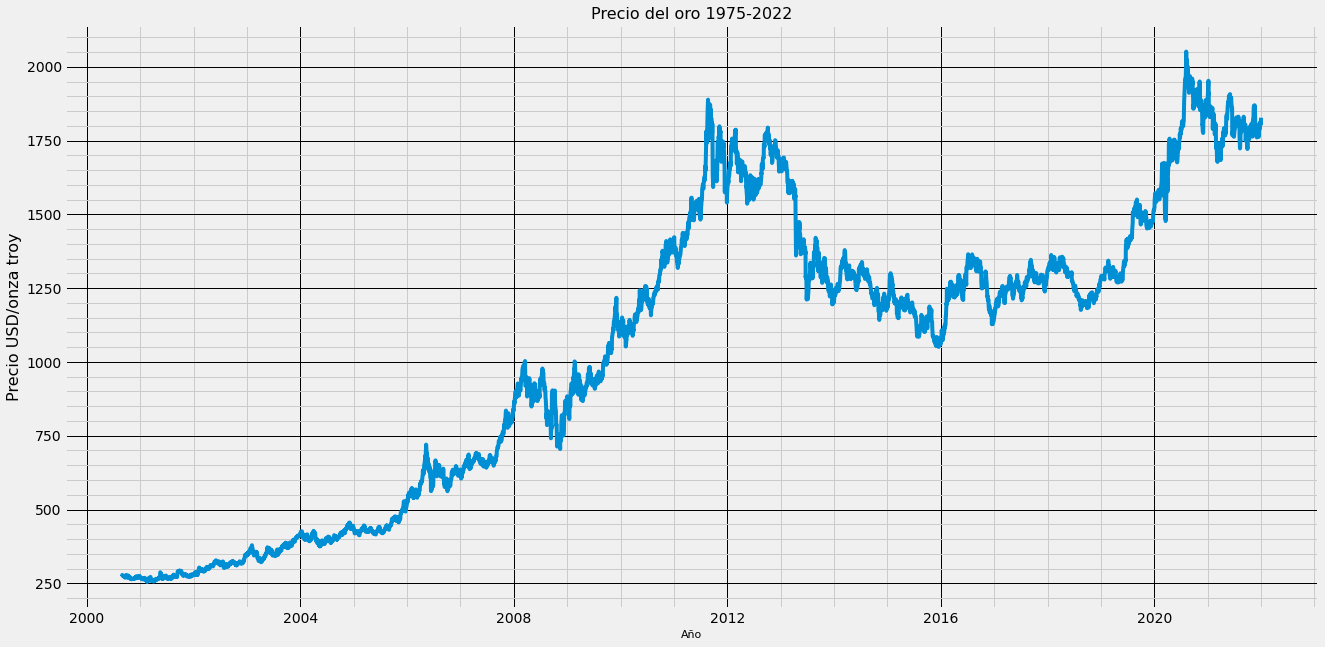

,Fecha,Ultimo,Apertura,%Ultimo,%Apertura,Event,Mac,Diferencia
0,1/4/1975,166.80,179.70,-7%,-2%,No,No,-5%
1,1/5/1975,169.00,167.00,1%,-7%,No,No,8%
2,1/6/1975,167.80,164.50,-1%,-1%,No,No,-2%
3,1/7/1975,173.40,168.30,3%,2%,No,No,4%
4,1/8/1975,162.80,173.80,-6%,3%,No,No,-9%
...,...,...,...,...,...,...,...,...
566,1/6/2022,1812.00,1840.00,-2%,-3%,No,No,2%
567,1/7/2022,1771.50,1810.30,-2%,-2%,No,No,0%
568,1/8/2022,1721.40,1772.20,-3%,-2%,No,No,-1%
569,1/9/2022,1672.00,1708.00,-3%,-4%,No,No,0%


In [77]:
#El dataset no se ve modificado al extraer las fechas de Yfinance , únicamente se relacionan con las fechas.
#Es necesario cargar primer onuestro archivo para que no sufran cambios.

start_date = datetime(1976, 1, 1)
end_date = datetime(2022, 1, 1)
  
# Se obtienen los datos de precio del oro con el código de las acciones que en el caso del oro es GC=F, pero no se utilizan,sólo se extraen las fechas.
#Se utiliza el dataset original.
data = yf.download('GC=F', start = start_date,
                   end = end_date)
  
# Para graficar los datos, se indican las etiquetas de cada eje, el tamaño de letra  y el tamaño del gráfico.
plt.figure(figsize = (20,10))
plt.title('Precio del oro 1975-2022',fontsize=16)
plt.plot(data['Close'])
plt.xlabel('Año',fontsize=11)
plt.ylabel('Precio USD/onza troy',fontsize=16)
plt.minorticks_on()
plt.grid(which='both')
plt.grid(color='k', linestyle='-')
plt.show()
df

In [78]:
df.describe()
#Se muestran las estadísticas del dataset cargado

,Ultimo,Apertura
count,571.000000,571.000000
mean,684.826532,682.940893
std,505.249813,504.076604
min,103.200000,104.300000
25%,338.700000,338.550000
50%,409.200000,408.200000
75%,1172.150000,1156.700000
max,1974.500000,1985.200000


In [79]:
#Se muestr el número de filas y columnas por los que está formado el dataset.
df.shape

(571, 8)

In [80]:
Mdata = df.filter(['Ultimo'])
#Se filtran los datos para trabajar con los precios de cierre.
dataset = Mdata.values
training_data_len=math.ceil(len(dataset)*.8)
# si se toma la decision de entrenar el modelo con el 80% de los datos.
training_data_len
#Muestra la cantidad de datos que serán utilizados para el entrenamiento, en este caso 457.

457

In [81]:
scaler = MinMaxScaler(feature_range=(0,1))
#Es necesario escalar el dataset en valores de 0 a 1 para que el modelo LSTM pueda entenderlos.
scaled_data = scaler.fit_transform(dataset)
#Se indica que dataset necesitamos que se escalen.
scaled_data

array([[0.03398707],
       [0.03516272],
       [0.03452146],
       [0.03751403],
       [0.03184952],
       [0.02084113],
       [0.02116176],
       [0.01902421],
       [0.02019986],
       [0.01378721],
       [0.015711  ],
       [0.01416128],
       [0.01373377],
       [0.01287875],
       [0.01106183],
       [0.00587827],
       [0.        ],
       [0.0068936 ],
       [0.01100839],
       [0.015711  ],
       [0.01736761],
       [0.01645915],
       [0.02212366],
       [0.02554374],
       [0.02394058],
       [0.02196334],
       [0.02158927],
       [0.02345963],
       [0.02399401],
       [0.02842943],
       [0.03179608],
       [0.03158232],
       [0.03436114],
       [0.04045316],
       [0.04339229],
       [0.04435419],
       [0.03601774],
       [0.06102709],
       [0.05931705],
       [0.07166141],
       [0.07192861],
       [0.07887565],
       [0.09255598],
       [0.06375247],
       [0.08304387],
       [0.08475391],
       [0.09512104],
       [0.086

In [82]:
entrena_data=scaled_data[0:training_data_len,:]
entrena_data
#Se crea el dataset de entreno escalado.

array([[0.03398707],
       [0.03516272],
       [0.03452146],
       [0.03751403],
       [0.03184952],
       [0.02084113],
       [0.02116176],
       [0.01902421],
       [0.02019986],
       [0.01378721],
       [0.015711  ],
       [0.01416128],
       [0.01373377],
       [0.01287875],
       [0.01106183],
       [0.00587827],
       [0.        ],
       [0.0068936 ],
       [0.01100839],
       [0.015711  ],
       [0.01736761],
       [0.01645915],
       [0.02212366],
       [0.02554374],
       [0.02394058],
       [0.02196334],
       [0.02158927],
       [0.02345963],
       [0.02399401],
       [0.02842943],
       [0.03179608],
       [0.03158232],
       [0.03436114],
       [0.04045316],
       [0.04339229],
       [0.04435419],
       [0.03601774],
       [0.06102709],
       [0.05931705],
       [0.07166141],
       [0.07192861],
       [0.07887565],
       [0.09255598],
       [0.06375247],
       [0.08304387],
       [0.08475391],
       [0.09512104],
       [0.086

In [83]:
x_entrena=[]
y_entrena=[]

#Separa la data en entramiento y predicciones, los entrenamientos en x y las predicciones en y.

for i in range(31,len(entrena_data)):

  #Se crea un bucle con un rango que vaya desde los datos disponibles para realizar una conversion a 3 dimensiones(31), hasta la longitud
  #de los datos de entrenamiento.
  #Los datos de entrenamiento disponibles son 457, no se puede colocar un numero mayor a 31 porque 426+31=547, si se coloca un numero mayor, se excede
  #la data disponible y se genera un error.
  x_entrena.append(entrena_data[i-31:i,0])
  y_entrena.append(entrena_data[i,0])
  if i<=31:
    print(x_entrena)
    print(y_entrena)
    print()

[array([0.03398707, 0.03516272, 0.03452146, 0.03751403, 0.03184952,
       0.02084113, 0.02116176, 0.01902421, 0.02019986, 0.01378721,
       0.015711  , 0.01416128, 0.01373377, 0.01287875, 0.01106183,
       0.00587827, 0.        , 0.0068936 , 0.01100839, 0.015711  ,
       0.01736761, 0.01645915, 0.02212366, 0.02554374, 0.02394058,
       0.02196334, 0.02158927, 0.02345963, 0.02399401, 0.02842943,
       0.03179608])]
[0.03158232244963395]



In [84]:
#Se convierte los datos en numpy array.
x_entrena,y_entrena=np.array(x_entrena),np.array(y_entrena)

In [85]:
#se convierte el valor inicial unidimensional en uno tridimensional, remodela el dataset.
x_entrena.shape
x_entrena=np.reshape(x_entrena,(x_entrena.shape[0],x_entrena.shape[1],1))
x_entrena.shape

(426, 31, 1)

In [86]:
#Se construye el modelo LSTM
#Consta de cuatro capas , la dos primeras con 50 neuronas cada una, la tercera con 25 y la última con una.
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_entrena.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [87]:
#Para compilar el modelo se utiliza un optimizador , el optimizador Adam.
model.compile(optimizer='adam',loss='mean_squared_error')

In [88]:
#El batch_size es la cantidad de datos disponibles para entrenar al modelo, que son 426 que no están dentro del bucle.
#epochs es el número de iteraciones que se realiza cuando un conjunto de datos completos avanza o retrocede dentro del modelo.
model.fit(x_entrena,y_entrena,batch_size=1,epochs=1)

426/426 [==============================] - 11s 17ms/step - loss: 0.0042


In [89]:
#Se crea el dataset de prueba,se crea un nuevo paquete de datos escalados a partir de datos que ya conocemos para ver que tan bien está hecha la predicción.
test_data=scaled_data=scaled_data[training_data_len-31:,:]


In [90]:
#Se recopila los datos originales, los que no han sido escalados
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(31,len(test_data)):
  x_test.append(test_data[i-31:i,0])

In [91]:
#Se convierte el dataset del paso anterior en una matriz.
x_test=np.array(x_test)

In [92]:
#Se obtiene las predicciones que da el modelo y las imprime.
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

4/4 [==============================] - 1s 13ms/step
[[1616.3356]
 [1586.8673]
 [1541.518 ]
 [1495.7556]
 [1458.6852]
 [1425.0713]
 [1396.1666]
 [1367.2482]
 [1337.2252]
 [1311.2549]
 [1295.3042]
 [1284.1718]
 [1277.9265]
 [1271.6375]
 [1271.0532]
 [1271.2476]
 [1272.2252]
 [1268.3438]
 [1258.9253]
 [1246.8567]
 [1234.5847]
 [1229.6138]
 [1225.0647]
 [1219.1094]
 [1212.6354]
 [1206.7656]
 [1200.4637]
 [1188.9899]
 [1177.6805]
 [1166.0739]
 [1156.9775]
 [1144.887 ]
 [1131.4974]
 [1122.1058]
 [1124.0404]
 [1133.1046]
 [1150.0225]
 [1165.4932]
 [1186.1709]
 [1210.6306]
 [1232.6234]
 [1251.9297]
 [1265.1381]
 [1266.4657]
 [1258.7546]
 [1249.857 ]
 [1243.9252]
 [1240.0958]
 [1239.3163]
 [1240.9342]
 [1241.7994]
 [1243.9478]
 [1250.1732]
 [1256.0688]
 [1260.5071]
 [1263.9629]
 [1268.9204]
 [1276.6492]
 [1284.027 ]
 [1291.1189]
 [1297.1482]
 [1300.8232]
 [1299.4767]
 [1293.0582]
 [1282.1833]
 [1268.7242]
 [1256.1669]
 [1245.6628]
 [1241.3732]
 [1244.1296]
 [1250.7943]
 [1258.0397]
 [1264.3993]

In [93]:
#Mediante el RMSE se calcula la distancia cuadrática de los valores predichos y los valores reales.
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

115.79594229968913

In [94]:
 #Este codigo tambien calcula el RMSE.
rmse =np.sqrt(np.mean(((predictions- y_test)**2)))
rmse = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rmse = np.sqrt(((predictions - y_test) ** 2).mean())
rmse

115.79594229968913

In [95]:
#Se recolectan los valores de entrenamiento y predicciones para poder imprimirlos más adelante.
train=Mdata[:training_data_len]
valid=Mdata[training_data_len:]
valid['Predictions']=predictions

<ipython-input-95-0186c0c172e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


[*********************100%***********************]  1 of 1 completed


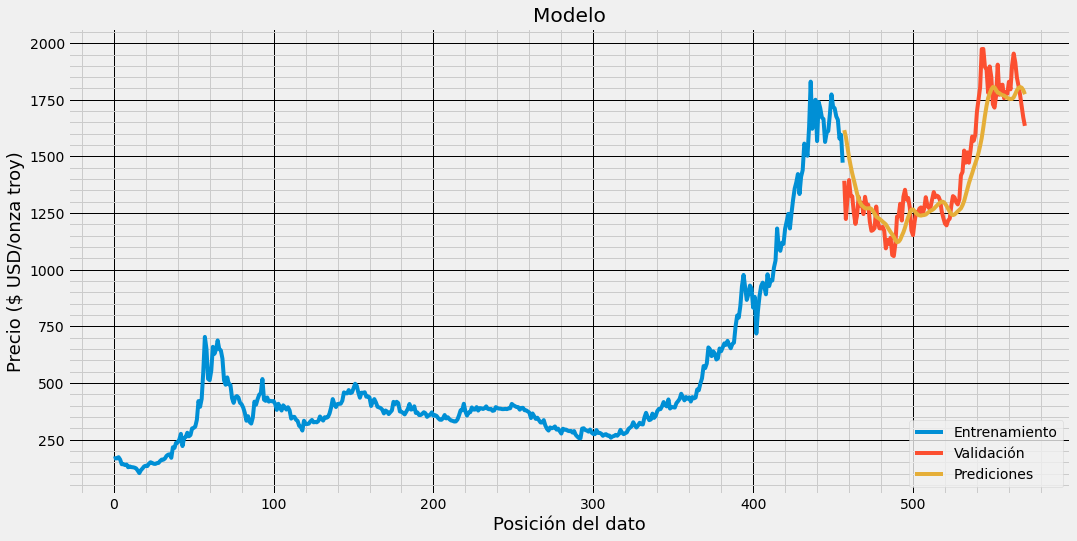

In [97]:
start_date = datetime(1976, 1, 1)
end_date = datetime(2022, 1, 1)
  

data = yf.download('GC=F', start = start_date,
                   end = end_date)
  
plt.figure(figsize=(16,8))
plt.title('Modelo')
plt.xlabel('Posición del dato',fontsize=18)
plt.ylabel('Precio ($ USD/onza troy)',fontsize=18)
plt.plot(train['Ultimo'])
plt.plot(valid[['Ultimo','Predictions']])
plt.legend(['Entrenamiento','Validación','Prediciones'],loc='lower right')
plt.minorticks_on()
plt.grid(which='both')
plt.grid(color='k', linestyle='-')
plt.show()


[*********************100%***********************]  1 of 1 completed


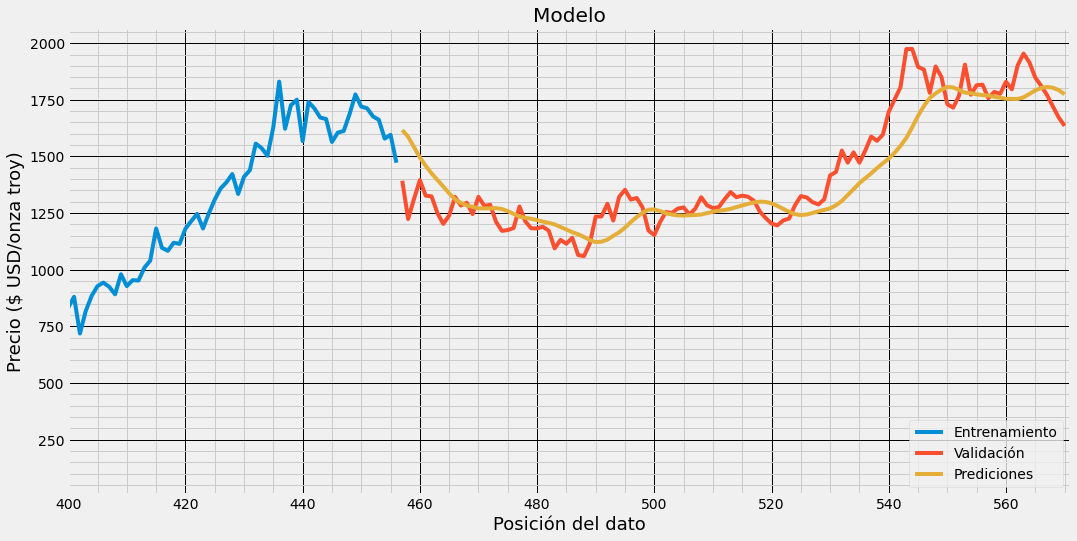

In [98]:
#La gráfica resultante es un acercamiento a la gráfica de entrenamiento, validación y predicciones
start_date = datetime(1976, 1, 1)
end_date = datetime(2022, 1, 1)
  

data = yf.download('GC=F', start = start_date,
                   end = end_date)
  
plt.figure(figsize=(16,8))
plt.title('Modelo')
plt.xlabel('Posición del dato',fontsize=18)
plt.ylabel('Precio ($ USD/onza troy)',fontsize=18)
plt.plot(train['Ultimo'])
plt.plot(valid[['Ultimo','Predictions']])
plt.legend(['Entrenamiento','Validación','Prediciones'],loc='lower right')
plt.xlim(400,571)
plt.minorticks_on()
plt.grid(which='both')
plt.grid(color='k', linestyle='-')
plt.show()

In [100]:
#Se imprimen los datos reales junto con la predicción, a la izquierda se tiene la posición del dato.
#En este caso no se trabaja con las fechas porque el modelo no las reconoce como tal.
valid

,Ultimo,Predictions
457,1393.00,1616.335571
458,1224.20,1586.867310
459,1312.60,1541.517944
460,1395.90,1495.755615
461,1327.00,1458.685181
...,...,...
566,1812.00,1802.276001
567,1771.50,1806.502563
568,1721.40,1803.560913
569,1672.00,1792.903198


In [102]:
#Se exportan los datos para poder trabajar con ellos en Excel.Este archivo se guarda directamente en 
#Colaboratory , desde donde se puede descargar.
valid.to_excel('validacion.xlsx')

[*********************100%***********************]  1 of 1 completed


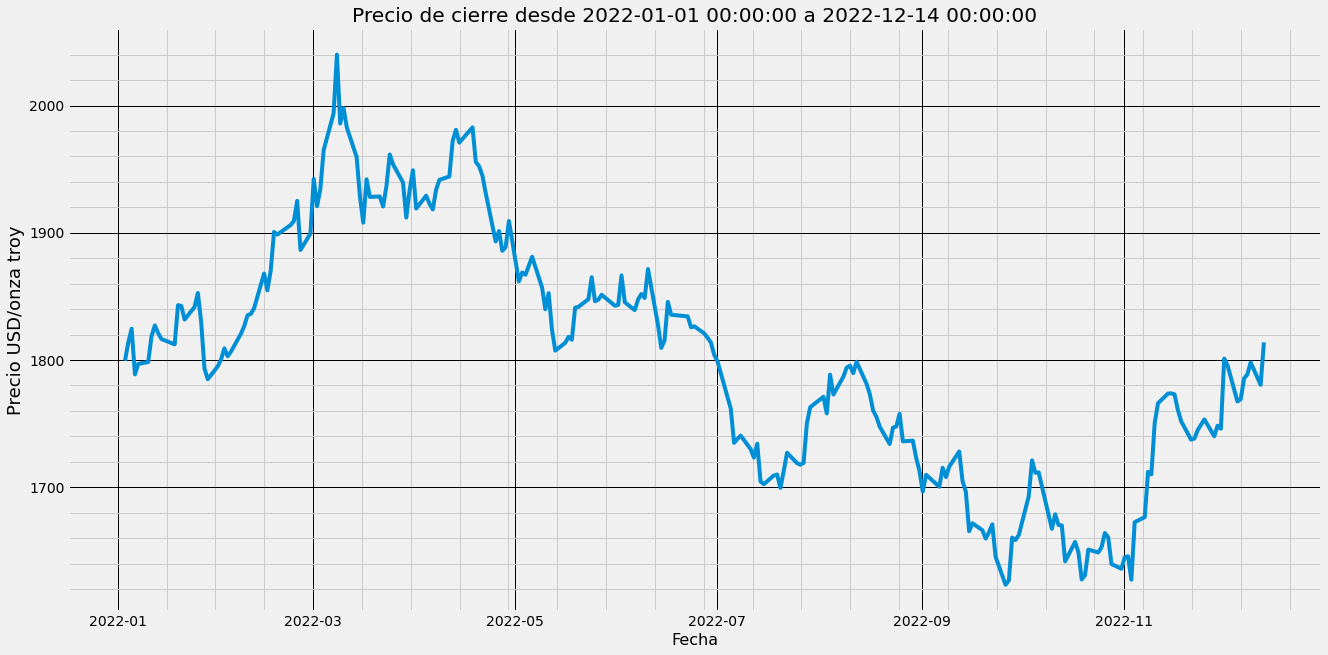

In [108]:
#Se importan las librerias necesarias para realizar una predicción.

from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
  
# Se indica la fecha de inicio y la final de la cual se quieren tomar los datos
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 12, 14)
  
# Se obtienen los datos de YFinance 
data = yf.download('GC=F', start = start_date,
                   end = end_date)
#Se exporta los datos con los que se van a trabajar como un archivo csv.
data.to_csv('NData.csv')
  
# Mostrar los datos por medio de un gráfico.
plt.figure(figsize = (20,10))
plt.title('Precio de cierre desde {} a {}'.format(start_date,
                                                end_date))
plt.plot(data['Close'])
plt.xlabel('Fecha',fontsize=16)
plt.ylabel('Precio USD/onza troy',fontsize=18)
plt.minorticks_on()
plt.grid(which='both')
plt.grid(color='k', linestyle='-')
plt.show()

In [113]:
#Se filtran los datos con los que quiere trabajar , en este caso los de cierre en un nuevo dataset.
new_df=data.filter(['Close'])
new_df.to_csv('Nueva_data_filtrada.csv')
new_df


,Close
Date,
2022-01-03 00:00:00-05:00,1799.400024
2022-01-04 00:00:00-05:00,1814.000000
2022-01-05 00:00:00-05:00,1824.599976
2022-01-06 00:00:00-05:00,1788.699951
2022-01-07 00:00:00-05:00,1797.000000
...,...
2022-12-07 00:00:00-05:00,1785.500000
2022-12-08 00:00:00-05:00,1788.699951
2022-12-09 00:00:00-05:00,1798.099976


In [114]:
# Se indica qué cantidad de datos se quieren tomar para la predicción, en este caso los últimos 120 días
ultimosdias=new_df[-120:].values
ultimosdias_scaled=scaler.transform(ultimosdias)

X_test=[]
X_test.append(ultimosdias_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

#Arroja la predicción del día siguiente de los datos con los que se realizó la predicción
preciofut=model.predict(X_test)
preciofut=scaler.inverse_transform(preciofut)
print(preciofut)

1/1 [==============================] - 1s 965ms/step
[[1745.3961]]


In [115]:
#Se imprime los datos con los que se realizó la predicción.
predictiones=model.predict(x_test)
predictiones=scaler.inverse_transform(predictiones)
predictiones

4/4 [==============================] - 0s 11ms/step


array([[1616.3356],
       [1586.8673],
       [1541.518 ],
       [1495.7556],
       [1458.6852],
       [1425.0713],
       [1396.1666],
       [1367.2482],
       [1337.2252],
       [1311.2549],
       [1295.3042],
       [1284.1718],
       [1277.9265],
       [1271.6375],
       [1271.0532],
       [1271.2476],
       [1272.2252],
       [1268.3438],
       [1258.9253],
       [1246.8567],
       [1234.5847],
       [1229.6138],
       [1225.0647],
       [1219.1094],
       [1212.6354],
       [1206.7656],
       [1200.4637],
       [1188.9899],
       [1177.6805],
       [1166.0739],
       [1156.9775],
       [1144.887 ],
       [1131.4974],
       [1122.1058],
       [1124.0404],
       [1133.1046],
       [1150.0225],
       [1165.4932],
       [1186.1709],
       [1210.6306],
       [1232.6234],
       [1251.9297],
       [1265.1381],
       [1266.4657],
       [1258.7546],
       [1249.857 ],
       [1243.9252],
       [1240.0958],
       [1239.3163],
       [1240.9342],


[*********************100%***********************]  1 of 1 completed


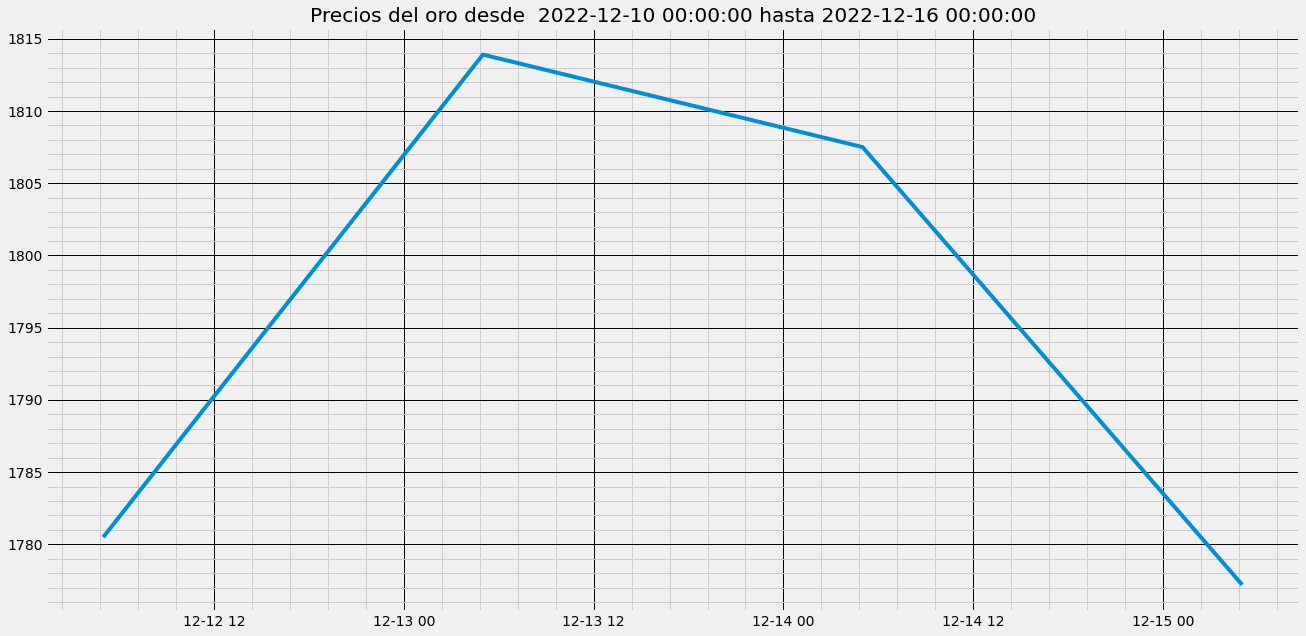

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-12 00:00:00-05:00,1787.300049,1793.900024,1777.699951,1780.500000,1780.500000,85
2022-12-13 00:00:00-05:00,1780.699951,1819.800049,1780.500000,1813.900024,1813.900024,205
2022-12-14 00:00:00-05:00,1810.800049,1812.800049,1797.900024,1807.500000,1807.500000,1074
2022-12-15 00:00:00-05:00,1801.000000,1801.000000,1774.800049,1777.199951,1777.199951,421


In [116]:
#Si la fecha que se predijo ya ha pasado , se pueden cargar los datos reales para ver que tan buena fue la redicción, como se hace a continuación.
start_date = datetime(2022, 12, 10)
end_date = datetime(2022, 12, 16)
  
data = yf.download('GC=F', start = start_date,
                   end = end_date)
  
plt.figure(figsize = (20,10))
plt.title('Precios del oro desde  {} hasta {}'.format(start_date,
                                                end_date))
plt.plot(data['Close'])
plt.minorticks_on()
plt.grid(which='both')
plt.grid(color='k', linestyle='-')
plt.show()
data